# **Tutorial:** Organizing and Visualizing Data: Histograms and Summary Statistics

### In this tutorial we will learn how to work with data to visualize data distributions and summary statistics.

### For the demonstrations here we will make use of the response time data from my lab experiment we briefly looked at in class.

### In this experiment, the subject is discriminating between two visual stimuli.  The discrimination gets progressively harded in 3 experimental conditions, reflecting potentially changes in information processing speed and in decision criterion. 

### Although we used a different stimulus in our experiment, you can get a feel for our experiment by looking at a similar task with varying levels of difficulty

<img src=attachment:72cdd010-79dd-41f1-a5c2-87b6874c038b.png width = "300"> \\
### When a task becomes more difficult we expect a broader response time distribution as subjects are possibly slower and more cautious in decision making. We can actually separate those two effects by modeling the shape of the response time distirbuion, but that is another story for another day. 
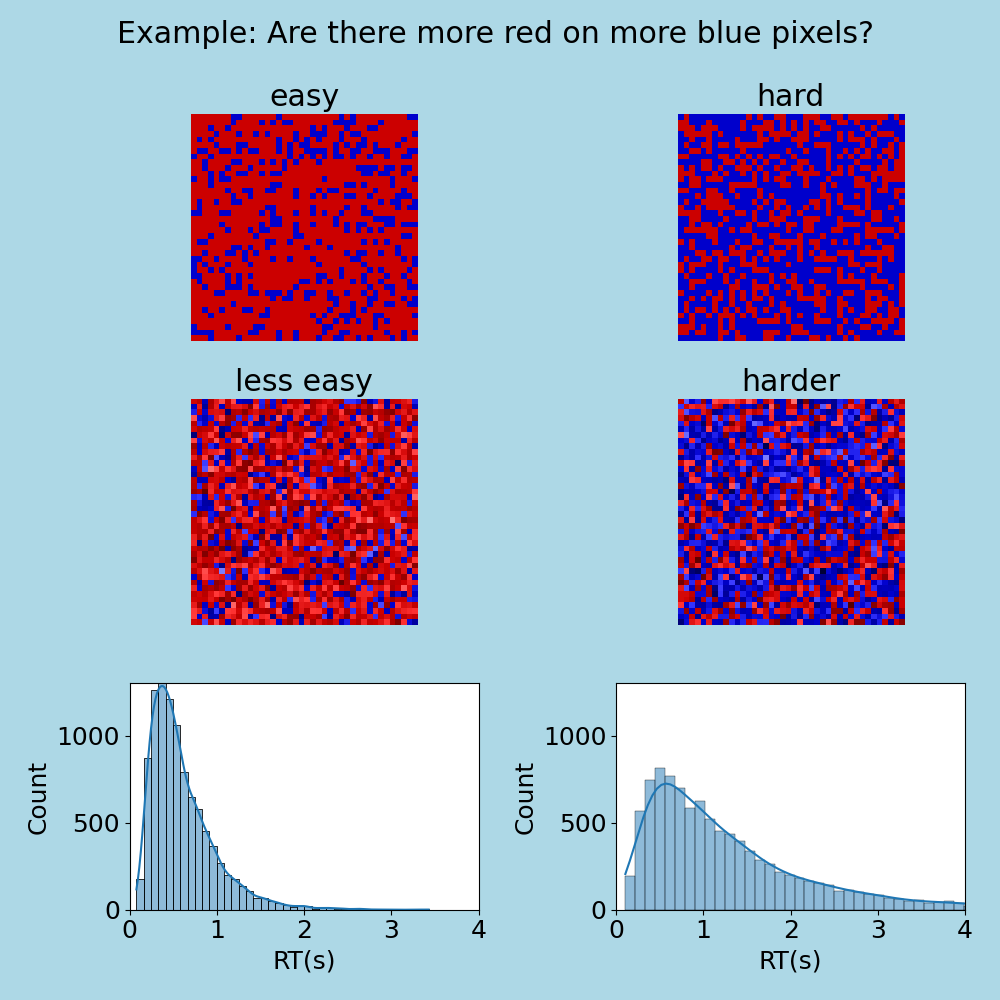

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#read in the data from a excel file.  
rtdata = pd.read_excel('rtdata.xlsx')
### Before we get started, lets copy the values from the DataFrame to variables 
### I always go ahead and convert them into numpy arrays  
trialnumber = np.array(rtdata['trialnumber']) # this tells you the order of trials.  i wont use it in this tutorial 
condition = np.array(rtdata['condition']) #this is the experimental condition (difficulty, coded as easy = 1, middle = 2, hard = 3) 
condition_labels = ['Easy','Middle','Hard']
responsetime = np.array(rtdata['responsetime']) #this is the actual response time data in seconds.  

## Organizing Data using Boolean Statements

### The organization of the data file reflects the order of stimulus presentation in the experiment.  
### In order to work with the data, we need to be able to separate experimental conditions.  
### Logical statements can be used to create Boolean arrays that identify which trials belong to each condition.  

In [ ]:
# Although I know there are 3 conditions, labeled, 1,2,3 I can (and should) actually get this directly from the data 
# When programming for data analysis the more that you infer from the data file the more reliable its going to be. 
expcond = np.unique(condition) # this makes an array with all the unique values in condition. 
print('Conditions are ', expcond)
ncond = np.size(expcond) # this tells me how many conditions I have, 


In [ ]:
c1 = condition ==1 # data for condition 1
c2 = condition ==2 # data for condition 2
c3 = condition ==3 # data for condition 3

### c1, c2, c3 are boolean arrays of the same length as the number of trials in the experiments. 
### They have the value **True** if the condition number matches the `==` condition or **False** otherwise. 
### We could use these variables to extract the subset of data in each condition 

In [ ]:
rt1 = responsetime[c1]
rt2 = responsetime[c2]
rt3 = responsetime[c3]

In [ ]:
#ANOTHER WAY WE COULD DO IT 
rt1 = responsetime[condition == 1]
rt2 = responsetime[condition == 2]
rt3 = responsetime[condition == 3]

### In practice creating more variables is just more things you have to keep track off. 
### I could make these variables **rt1** etc.
### Or, I could just get the same data by writing out **responsetime[condition == 1]**.  
### While the second option perhaps means more typing, I find it sometimes useful to help me keep track of things. 

## Summary Statistics
### I am going to compute some summary statistics: `mean`, `median`,`std`, for each expeirmental condition. 
### In addition, I want to save the 10,30, 50, 70, 90 percentile, using 'percentile'
### I want to save them in an organized fashion. 
### The most natural thing to do in python is to create and store them in lists. 
### Lets fill each of these for condition.  In each case the output is a list with 3 variables, 1 for each condition.  

In [ ]:
# Lets define empty lists that we want to generate 
mean_rt = list()
median_rt = list()
std_rt = list() 
percentile_rt = list() 
percentile_vals = [10,30,50,70,90] # I will want to save the values of 10,30,50,70,90 percentile.  

In [ ]:
# means
mean_rt.append(np.mean(responsetime[condition == 1])) 
mean_rt.append(np.mean(responsetime[condition == 2]))
mean_rt.append(np.mean(responsetime[condition == 3]))
#YOU COULD HAVE ALSO DONE IT LIKE THIS 
#mean_rt,append(np.mean(rt1)) 
#mean_rt.append(np.mean(rt2))
#mean_rt.append(np.mean(rt3))
#YOU COULD HAVE ALSO DONE IT LIKE THIS 
#mean_rt = [np.mean(responsetime[condition == 1]),np.mean(responsetime[condition == 2]),np.mean(responsetime[condition == 3])]
print(mean_rt)

In [ ]:
# median 
median_rt.append(np.median(responsetime[condition == 1])) 
median_rt.append(np.median(responsetime[condition == 2]))
median_rt.append(np.median(responsetime[condition == 3]))
print(median_rt)

In [ ]:
# standard deviation
std_rt.append(np.std(responsetime[condition == 1])) 
std_rt.append(np.std(responsetime[condition == 2]))
std_rt.append(np.std(responsetime[condition == 3]))
print(std_rt)

In [ ]:
# percentiles
percentile_rt.append(np.percentile(responsetime[condition == 1],percentile_vals))
percentile_rt.append(np.percentile(responsetime[condition == 2],percentile_vals))
percentile_rt.append(np.percentile(responsetime[condition == 3],percentile_vals))
print(percentile_rt[0])

## Dictionaries - Organizing Data with Meaningful Labels.  

### The main weakness of the list approach is that we have to now keep track of the idea that 
### condition = 1 ->  use index = 0, e.g., mean_rt[0] 
### condition = 2 ->  use index = 1, e.g., mean_rt[1]
### condition = 3 ->  use index = 2, e.g., mean_rt[2] 

### Another way to organize information is to use a **dictionary**.  
### A dictionary works much like a pandas DataFrame but is much more flexible.  
### DataFrames come in columns of fixed length, while dictionaries can have entries of varying length.  

In [ ]:
#Here Im going to redo the perecentile calculation and use a dictionary with meaningful labels to store it. 
percentile_rt = dict() #this creates an empty dictionary 
# A dictionary uses keys instead of indices, much like a DataFrame. Here, I am going to use the condition names as the keys.  
percentile_rt['Easy'] = np.percentile(responsetime[condition == 1],percentile_vals)
percentile_rt['Middle'] = np.percentile(responsetime[condition == 2],percentile_vals)
percentile_rt['Hard'] = np.percentile(responsetime[condition == 3],percentile_vals)
# Now instead of indexing by numeric indices, I can index the dictionary using a key.  
print(percentile_rt.keys())
print(percentile_rt['Easy'])


## Histograms: Visualizing the distribution of the data

### One of the basic tools in understanding data is to visualize the **distribution** of the data.  How frequently to different values of the data appear? 

### To understand the distribution of the data, the first thing I need to do is to find the minimum and maximum of the data 

In [ ]:
max_rt = list()
max_rt.append(np.max(responsetime[condition == 1]))
max_rt.append(np.max(responsetime[condition == 2]))
max_rt.append(np.max(responsetime[condition == 3]))
min_rt = list()
min_rt.append(np.min(responsetime[condition == 1]))
min_rt.append(np.min(responsetime[condition == 2]))
min_rt.append(np.min(responsetime[condition == 3]))
print('minimum values:',min_rt)
print('maximum values:',max_rt)

### Condition 1 and Condition 2 have similar data ranges. Condition 3 has a wider range. 
### For visualization we want to choose a range that encapsulates all the data.  
### I am going to choose a range of 0.5 to 1.8 

### A **histogram** is a way of visualizing the data by **counting** the number of instances of the data at different values. 
### Of course each value of continuous valued data is (usually) only observed once, so we need to define intervals instead of single values. 
### The data lies in an interval from a minimum to a maximum value.  We can divide the interval into **bins** of the same width. 
### For example we can make a bin or response time ranging from 1.0 to 1.1, and count the number of times we observe a value 
### that falls within that interval.  If we do that for every interval of the same size from the minimum to the maximum of the data, we can make 
### a **histogram**.  

In [ ]:
fig = plt.figure(figsize = (4,3)) # I selected the figure dimension here 
ax = fig.add_axes([0,0,1,1])
bins = np.arange(0.5,1.9,0.1) # I specified that i wanted to divide the range from 0.5 to 1.9 in steps of 0.1 
ax.hist(responsetime[condition == 1],bins) # I made a histogram plot of rt1.  
ax.set_xticks(bins)
ax.set_xlabel('Response Time (sec)')
ax.set_ylabel('Number of Trials')  # the y axis is a count of the number of times (in this case trials) a value is observed in each bin
plt.show()

In [ ]:
### Its really easy to put them all in 1 graph by making a list of all the rts 
all_rts = list()
all_rts.append(responsetime[condition == 1])
all_rts.append(responsetime[condition == 2])
all_rts.append(responsetime[condition == 3])# I just made a list with all the rt values. 
bins = np.arange(0.5,1.9,0.1)
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
ax.hist(all_rts,bins)  #I sent the list containing all 3 arrays. 
ax.set_xlabel('Response Time (sec)')
ax.set_ylabel('Number of Trials')
ax.legend(labels = condition_labels)#notice in the legend command, i can put the labels here.  
plt.show()

### Notice there are several key features of the data now visible.  At the smaller values of response time (0.8 or less) we see mostly blue bars (condition 1) while for the large values of response time (1.4 or more) we see mostly green bars (condition 3)
### A progressive shift of the distribution to the right (higher values of response time) is clearly visible. 

### Here i take some aesthetic control of the graph

In [ ]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
bins = np.arange(0.5,1.9,0.1)
ax.hist(all_rts,bins,color=('blue','red','black')) # I chose my colors.  
ax.set_xlabel('Response Time (sec)')
ax.set_ylabel('Number of Trials')
ax.legend(labels = condition_labels)


In [ ]:
## Alternative to the histogram - the violin plot 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.violinplot(all_rts)  #this is the call to violin plot 
ax.set_xticks([1,2,3]) #I limited it to two ticks on the x axis 
ax.set_xticklabels(condition_labels) #I manually selected the x tick labels 
ax.set_xlabel('Conditions')
ax.set_ylabel('Response Time (sec)')
plt.show()

### The violin plots show the distribution as a "blob" where we can see where the values are distributed by how wide the blob is at any point. 
### It has the advanatage over the histogram that you dont artificially bin the data, and you can get a better overall feel for the distribution. 

## Plotting summary statistics 
### The bar command has the ability to express the error or uncertainty in the values.  
### The standard deviation expresses the variability of the data.  
### Usually when we plot means, we like to indicate the variability with an error estimate


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(condition_labels,mean_rt,color = 'blue', yerr = std_rt,capsize = 5) #this is the same bar command as before, BUT I added an error using the yerr parameter.                                                                      # I defined the error as the standard deviation.   
ax.set_xlabel('Condition')
ax.set_ylabel('Mean Response Time (sec)')
plt.show()

In [ ]:
#I like to plot the medians when I plot these. 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(condition_labels,mean_rt,color = 'blue', yerr = std_rt,capsize = 5) #this is the same bar command as before, BUT I added an error using the yerr parameter.                                                                      # I defined the error as the standard deviation.  
ax.plot(condition_labels,median_rt,'ro')
#ax.set_xticks([1,2,3])  #I limited it to two ticks on the x axis 
#ax.set_xticklabels(condition_labels) #I manually selected the x tick labels 
ax.set_xlabel('Condition')
ax.set_ylabel('Mean Response Time (sec)')
plt.show()

## Summarize the distribution with a percentile plot

### The shape of the distribution of the data can be summarized by plotting the values at different percentiles. 
### The percentiles nicely summarizes that the Easy and Middle distributions are similar but shifted, but the Hard distribution is wider. 

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(percentile_vals,percentile_rt['Easy'],'ro-',label = 'Easy')
ax.plot(percentile_vals,percentile_rt['Middle'],'bs-',label = 'Middle')
ax.plot(percentile_vals,percentile_rt['Hard'],'kD-',label = 'Hard')
ax.set_xlabel('Percentiles')
ax.set_ylabel('Response Time (sec)')
plt.show()
